In [51]:
import polars as pl

df_calif = pl.read_excel(source="calificaciones.xlsx", sheet_name='2019' , schema_overrides={'cod_semestre': pl.String, 'cod_alumno': pl.Utf8})
df_rep = pl.read_excel(source="repitencias.xlsx", sheet_name='2019' , schema_overrides={'cod_semestre': pl.String, 'cod_alumno': pl.Utf8})
df_tutorias = pl.read_excel(source="tutorias.xlsx", sheet_name='2019' )

df_calif = df_calif.drop(['cod_plan'])
df_rep = df_rep.drop(['cod_plan'])
df_tutorias = df_tutorias.drop(['num_res_autoriza', 'cod_tipo_autorizacion'])

In [52]:
df_features_calif = (
    df_calif
    .filter(pl.col("val_calific_final").is_between(0, 20))
    .with_columns(
        is_aprobado = pl.col("val_calific_final") >= 11
    )
    .group_by("cod_alumno")
    .agg(
        promedio_calif = pl.col("val_calific_final").mean(),
        std_calif = pl.col("val_calific_final").std(),
        num_asignaturas = pl.col("cod_asignatura").n_unique(),
        tasa_aprobacion = pl.col("is_aprobado").mean(),
        num_semestres_activos = pl.col("cod_semestre").n_unique()
    )
)

df_features_calif

cod_alumno,promedio_calif,std_calif,num_asignaturas,tasa_aprobacion,num_semestres_activos
str,f64,f64,u32,f64,u32
"""17070035""",13.090909,1.921174,11,0.909091,2
"""16080010""",11.818182,1.940009,11,0.727273,1
"""17060256""",12.166667,4.949747,18,0.833333,2
"""13130094""",12.692308,1.797434,13,1.0,2
"""18150321""",15.583333,2.84312,12,1.0,2
…,…,…,…,…,…
"""12020370""",11.666667,6.022181,6,0.833333,1
"""17110043""",14.214286,4.543441,14,0.928571,2
"""15020014""",15.8,2.250926,10,1.0,1


In [53]:
df_features_rep = (
    df_rep
    .group_by("cod_alumno")
    .agg(
        total_repitencias = pl.col("num_rep").sum(),
        max_rep_asignatura = pl.col("num_rep").max()
    )
)

df_features_rep

cod_alumno,total_repitencias,max_rep_asignatura
str,i64,i64
"""17050084""",1,1
"""11170211""",2,1
"""13200087""",10,2
"""15110174""",1,1
"""17170079""",1,1
…,…,…
"""12020268""",28,3
"""17120175""",1,1
"""993990 """,4,2


In [54]:
df_features_tutorias = (
    df_tutorias
    .group_by("cod_alumno")
    .agg(
        num_tutorias = pl.col("cod_alumno").count()
    )
)

df_features_tutorias

cod_alumno,num_tutorias
str,u32
"""13130170""",3
"""01114453""",1
"""17190281""",2
"""11030233""",1
"""14030127""",2
…,…
"""12160267""",1
"""16170303""",2
"""13160055""",2


In [55]:
df_final = (
    df_features_calif
    .join(df_features_rep, on="cod_alumno", how="left")
    .join(df_features_tutorias, on="cod_alumno", how="left")
    .fill_null(0)
)

df_final

cod_alumno,promedio_calif,std_calif,num_asignaturas,tasa_aprobacion,num_semestres_activos,total_repitencias,max_rep_asignatura,num_tutorias
str,f64,f64,u32,f64,u32,i64,i64,u32
"""17070035""",13.090909,1.921174,11,0.909091,2,0,0,0
"""16080010""",11.818182,1.940009,11,0.727273,1,0,0,0
"""17060256""",12.166667,4.949747,18,0.833333,2,1,1,0
"""13130094""",12.692308,1.797434,13,1.0,2,0,0,0
"""18150321""",15.583333,2.84312,12,1.0,2,0,0,0
…,…,…,…,…,…,…,…,…
"""12020370""",11.666667,6.022181,6,0.833333,1,37,4,4
"""17110043""",14.214286,4.543441,14,0.928571,2,1,1,0
"""15020014""",15.8,2.250926,10,1.0,1,0,0,0


In [56]:
df_contexto = (
    df_calif
    .select(["cod_alumno", "cod_facultad", "cod_escuela"])
    .group_by("cod_alumno")
    .agg(
        facultad_principal = pl.col("cod_facultad").mode().cast(pl.Int32).first(),
        escuela_principal = pl.col("cod_escuela").mode().cast(pl.Int32).first()
    )
)

In [57]:
df_final = df_final.join(df_contexto, on="cod_alumno", how="left")

In [58]:
df_final

cod_alumno,promedio_calif,std_calif,num_asignaturas,tasa_aprobacion,num_semestres_activos,total_repitencias,max_rep_asignatura,num_tutorias,facultad_principal,escuela_principal
str,f64,f64,u32,f64,u32,i64,i64,u32,i32,i32
"""17070035""",13.090909,1.921174,11,0.909091,2,0,0,0,7,2
"""16080010""",11.818182,1.940009,11,0.727273,1,0,0,0,8,1
"""17060256""",12.166667,4.949747,18,0.833333,2,1,1,0,6,2
"""13130094""",12.692308,1.797434,13,1.0,2,0,0,0,13,2
"""18150321""",15.583333,2.84312,12,1.0,2,0,0,0,15,5
…,…,…,…,…,…,…,…,…,…,…
"""12020370""",11.666667,6.022181,6,0.833333,1,37,4,4,2,3
"""17110043""",14.214286,4.543441,14,0.928571,2,1,1,0,11,1
"""15020014""",15.8,2.250926,10,1.0,1,0,0,0,2,2


In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Aseguramos que no haya nulos antes de pasar a Pandas para evitar errores en el Encoder
# Rellenamos numéricos con 0 y categóricos con un valor por defecto si fuera necesario
df_final_clean = df_final.fill_null(0) 

# Conversión a Pandas (requiere pyarrow instalado y kernel reiniciado)
df_pd = df_final_clean.to_pandas()

features_df = df_pd.drop(columns=["cod_alumno"])

numeric_features = [
    'promedio_calif', 'std_calif', 'num_asignaturas', 'tasa_aprobacion', 
    'num_semestres_activos', 'total_repitencias', 'max_rep_asignatura', 
    'num_tutorias'
]
categorical_features = ['facultad_principal', 'escuela_principal']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

X_scaled = preprocessor.fit_transform(features_df)
# filepath: c:\Users\mauri\OneDrive\Desktop\CICLO 8\mineria de datos\minieria.ipynb
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Aseguramos que no haya nulos antes de pasar a Pandas para evitar errores en el Encoder
# Rellenamos numéricos con 0 y categóricos con un valor por defecto si fuera necesario
df_final_clean = df_final.fill_null(0) 

# Conversión a Pandas (requiere pyarrow instalado y kernel reiniciado)
df_pd = df_final_clean.to_pandas()

features_df = df_pd.drop(columns=["cod_alumno"])

numeric_features = [
    'promedio_calif', 'std_calif', 'num_asignaturas', 'tasa_aprobacion', 
    'num_semestres_activos', 'total_repitencias', 'max_rep_asignatura', 
    'num_tutorias'
]
categorical_features = ['facultad_principal', 'escuela_principal']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

X_scaled = preprocessor.fit_transform(features_df)

In [60]:
df = pd.DataFrame(X_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.013709,-0.346458,0.397140,0.231125,0.538693,-0.436718,-0.639131,-0.324183
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.363242,-0.334853,0.397140,-0.517165,-1.856346,-0.436718,-0.639131,-0.324183
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.260029,1.519629,2.167807,-0.080662,0.538693,-0.108838,0.542199,-0.324183
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.104347,-0.422702,0.903045,0.605270,0.538693,-0.436718,-0.639131,-0.324183
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.751904,0.221609,0.650093,0.605270,0.538693,-0.436718,-0.639131,-0.324183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27587,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.408117,2.180420,-0.867622,-0.080662,-1.856346,11.694851,4.086188,6.121393
27588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.346426,1.269279,1.155997,0.311299,0.538693,-0.108838,0.542199,-0.324183
27589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.816075,-0.143278,0.144188,0.605270,-1.856346,-0.436718,-0.639131,-0.324183
27590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.330547,-0.310651,0.903045,-0.276643,0.538693,0.219042,0.542199,-0.324183


In [61]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

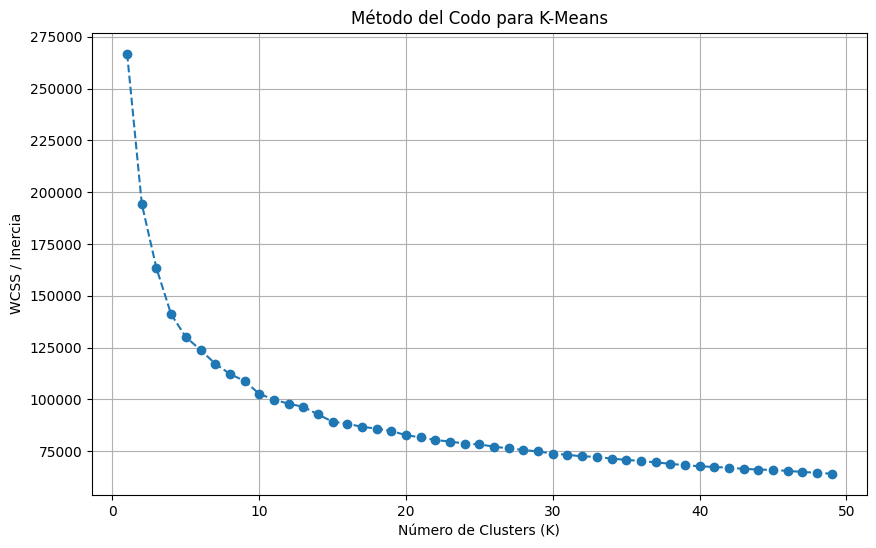

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS / Inercia')
plt.grid(True)
plt.show()

In [63]:
K_optimo = 5
kmeans_model = KMeans(n_clusters=K_optimo, random_state=42, n_init='auto')
clusters_kmeans = kmeans_model.fit_predict(X_scaled)

<Figure size 1000x800 with 0 Axes>

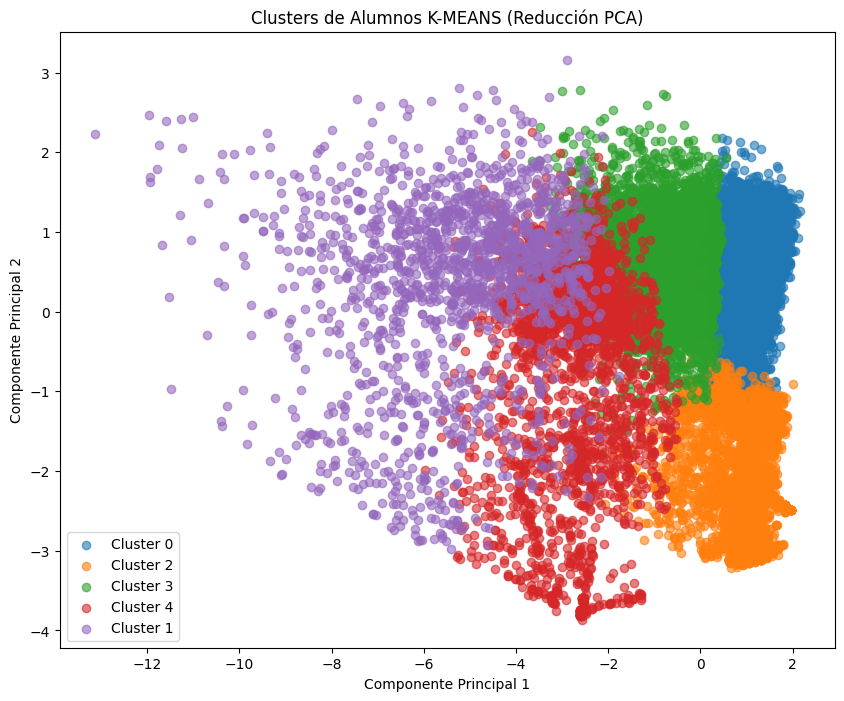

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters_kmeans

plt.figure(figsize=(10,8))

plt.figure(figsize=(10, 8))
for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(
        subset['PC1'], 
        subset['PC2'], 
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('Clusters de Alumnos K-MEANS (Reducción PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import silhouette_score

silhouette_avg_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Coeficiente de Silueta (KMeans): {silhouette_avg_kmeans:.3f}")

Coeficiente de Silueta (KMeans): 0.219


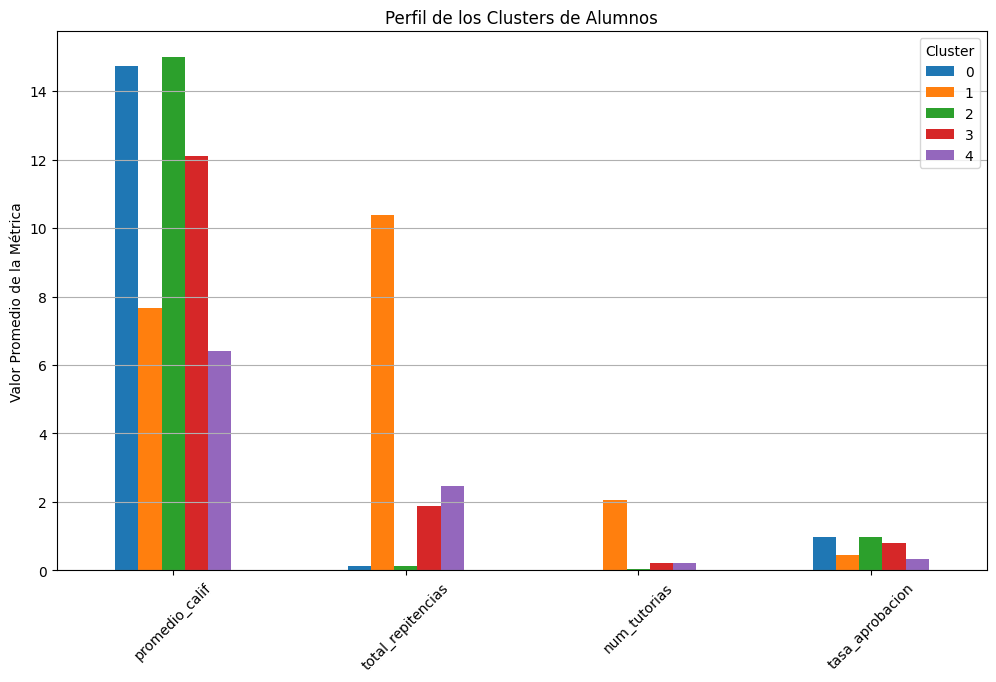

In [66]:
df_pd['Cluster'] = clusters_kmeans

profile_df = df_pd.groupby('Cluster')[['promedio_calif', 'total_repitencias', 'num_tutorias', 'tasa_aprobacion']].mean()

profile_df.T.plot(kind='bar', figsize=(12, 7))
plt.title('Perfil de los Clusters de Alumnos')
plt.ylabel('Valor Promedio de la Métrica')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

In [67]:
from sklearn.cluster import DBSCAN

eps_optimo = 0.3 # 0.5 
min_samples_optimo = 10 

dbscan_model = DBSCAN(eps=eps_optimo, min_samples=min_samples_optimo)
clusters_dbscan = dbscan_model.fit_predict(X_scaled)

<Figure size 1000x800 with 0 Axes>

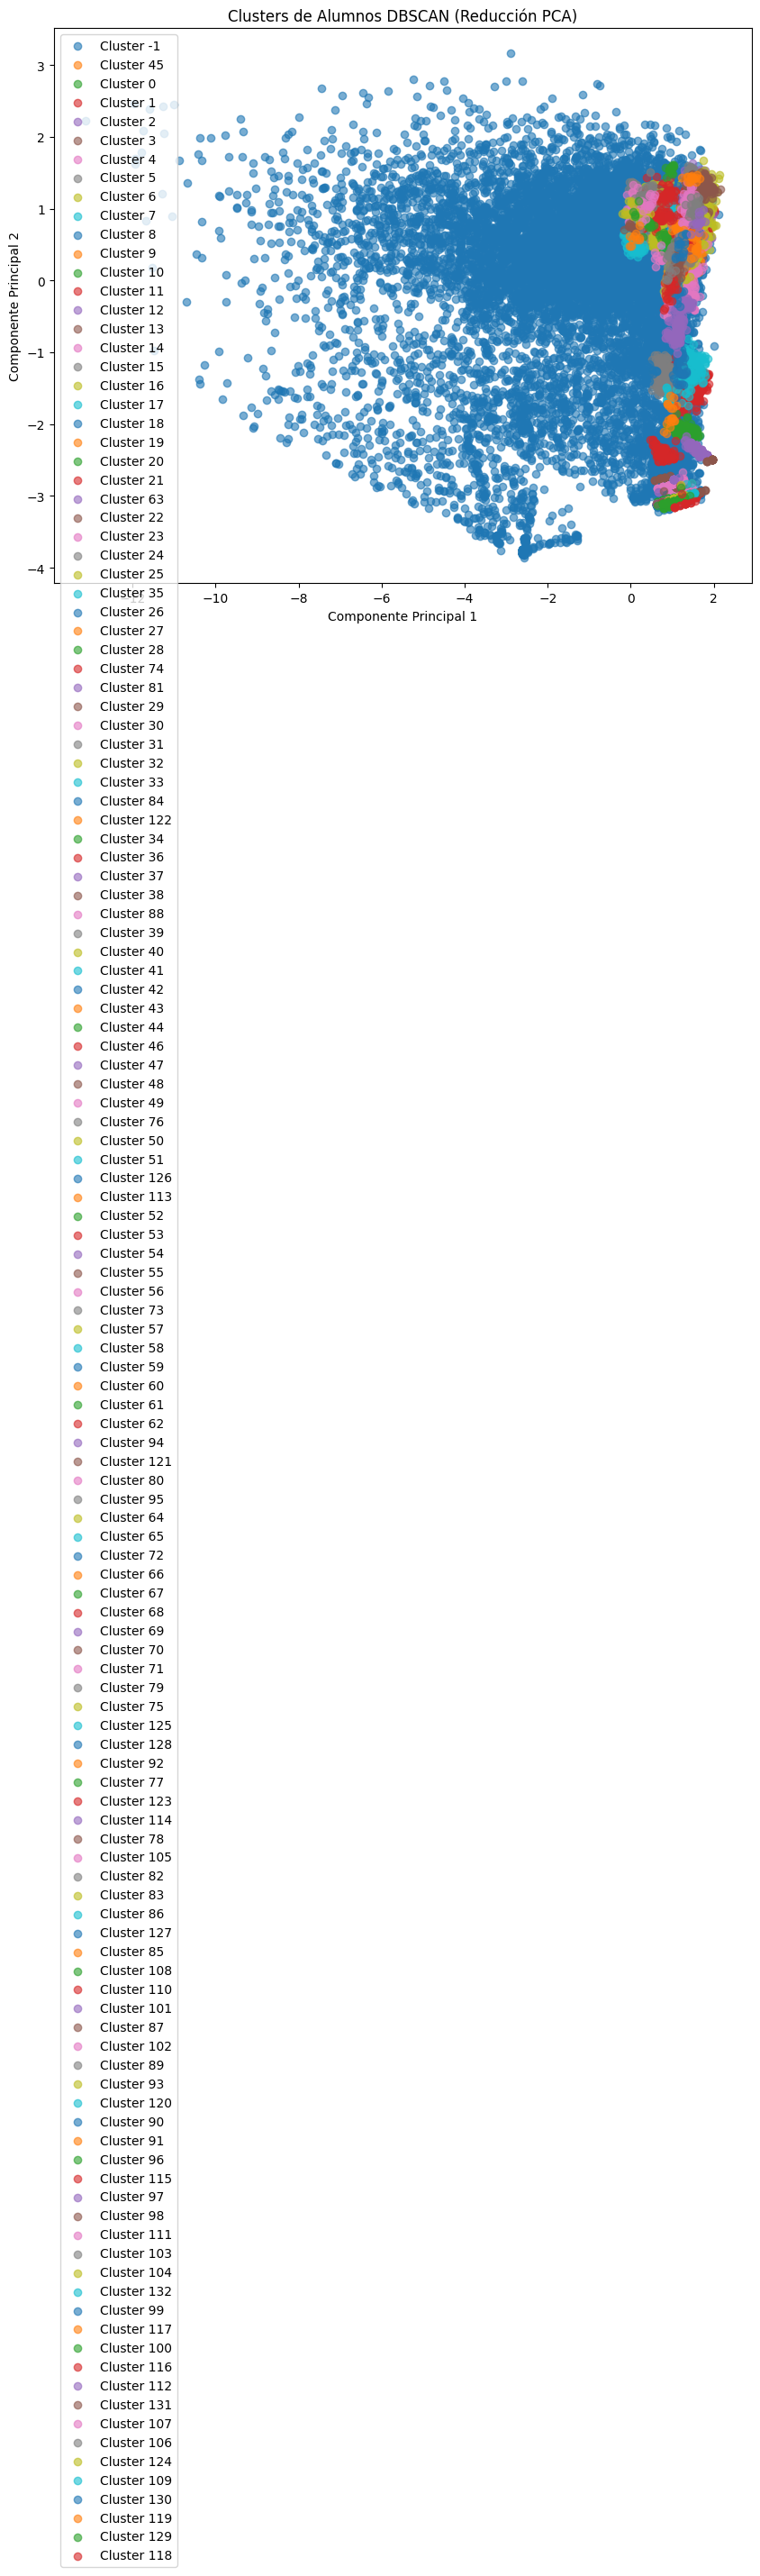

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters_dbscan

plt.figure(figsize=(10,8))

plt.figure(figsize=(10, 8))
for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(
        subset['PC1'], 
        subset['PC2'], 
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.title('Clusters de Alumnos DBSCAN (Reducción PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [69]:
non_noise_indices = clusters_dbscan != -1
if np.unique(clusters_dbscan[non_noise_indices]).size > 1:
    silhouette_avg_dbscan = silhouette_score(
        X_scaled[non_noise_indices], 
        clusters_dbscan[non_noise_indices]
    )
    print(f"Coeficiente de Silueta (DBSCAN - sin ruido): {silhouette_avg_dbscan:.3f}")
else:
    print("DBSCAN no encontró suficientes clusters (>1) para calcular la Silueta.")

Coeficiente de Silueta (DBSCAN - sin ruido): 0.518


### ANALISIS DE CLUSTER CON KPROTOTYPES

### EDA

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
features_df.head()

,promedio_calif,std_calif,num_asignaturas,tasa_aprobacion,num_semestres_activos,total_repitencias,max_rep_asignatura,num_tutorias,facultad_principal,escuela_principal
0,13.090909,1.921174,11,0.909091,2,0,0,0,7,2
1,11.818182,1.940009,11,0.727273,1,0,0,0,8,1
2,12.166667,4.949747,18,0.833333,2,1,1,0,6,2
3,12.692308,1.797434,13,1.000000,2,0,0,0,13,2
4,15.583333,2.843120,12,1.000000,2,0,0,0,15,5


In [72]:
features_df.columns

Index(['promedio_calif', 'std_calif', 'num_asignaturas', 'tasa_aprobacion',
       'num_semestres_activos', 'total_repitencias', 'max_rep_asignatura',
       'num_tutorias', 'facultad_principal', 'escuela_principal'],
      dtype='object')

In [73]:
numericas = ['promedio_calif', 'std_calif', 'num_asignaturas', 'tasa_aprobacion',
       'num_semestres_activos', 'total_repitencias', 'max_rep_asignatura',
       'num_tutorias'] # , 'facultad_principal', 'escuela_principal'

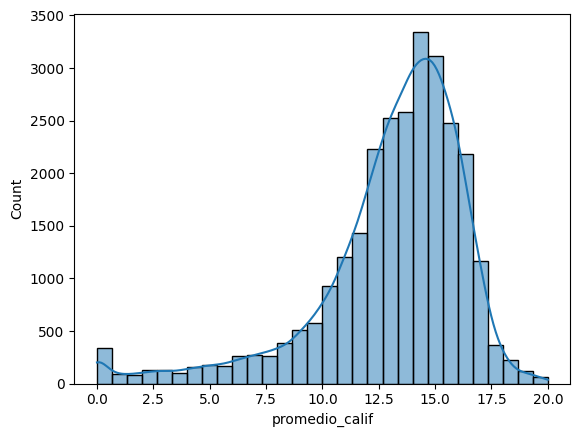

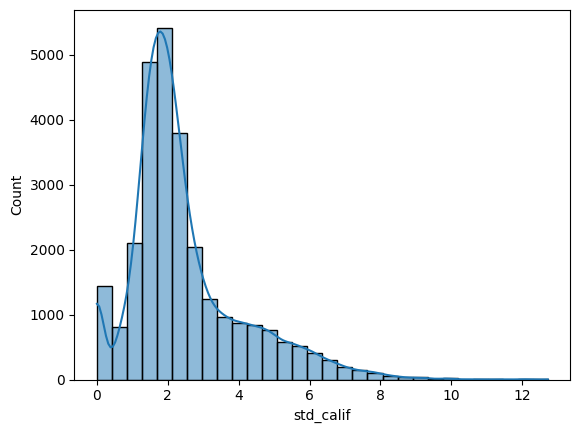

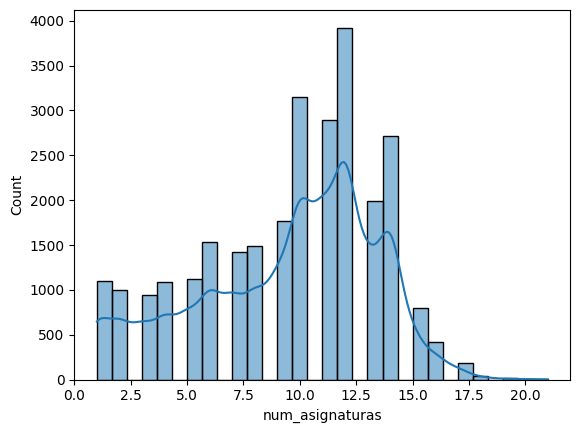

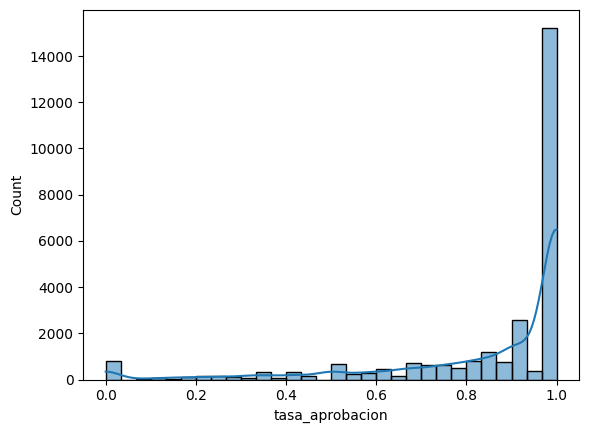

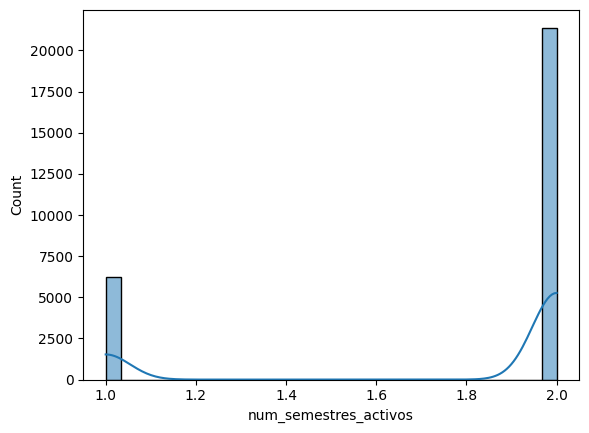

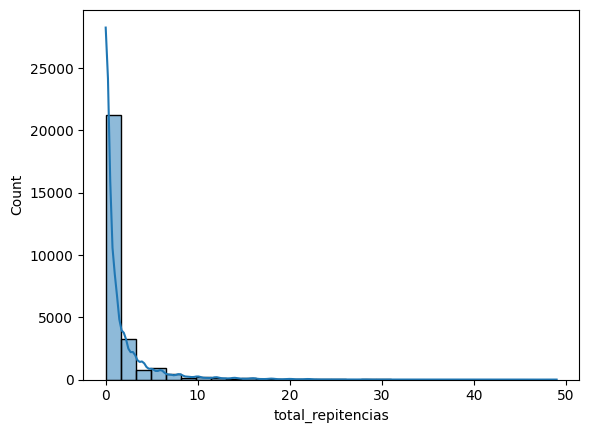

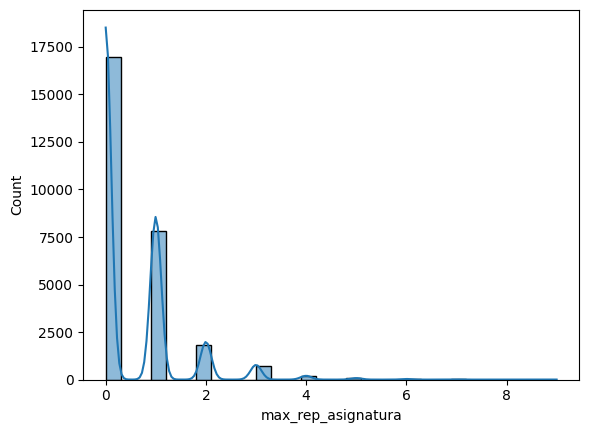

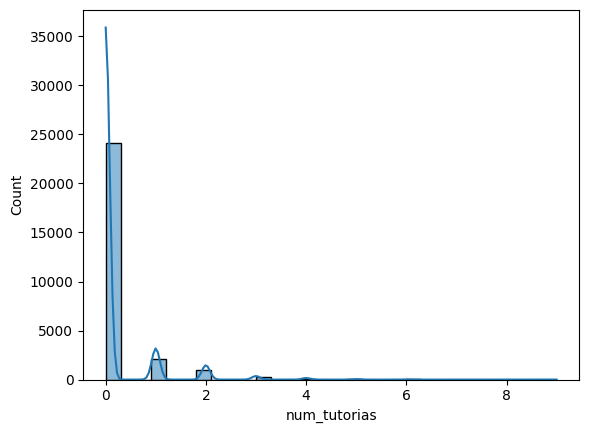

In [74]:
for col in numericas:
    sns.histplot(features_df[col], kde=True, bins=30)
    plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
numeric_features = [
    'promedio_calif', 'std_calif', 'num_asignaturas', 'tasa_aprobacion', 
    'num_semestres_activos', 'total_repitencias', 'max_rep_asignatura', 
    'num_tutorias'
]
categorical_features = ['facultad_principal', 'escuela_principal']

# SOLO escalamos los numéricos, las categorías las dejamos pasar igual ('passthrough')
preprocessor_kproto = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features) 
    ]
)

X_prepared = preprocessor_kproto.fit_transform(features_df)

In [77]:
X_scaled

array([[ 0.        ,  0.        ,  0.        , ..., -0.43671815,
        -0.63913057, -0.32418267],
       [ 0.        ,  0.        ,  0.        , ..., -0.43671815,
        -0.63913057, -0.32418267],
       [ 0.        ,  0.        ,  0.        , ..., -0.1088379 ,
         0.54219919, -0.32418267],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.43671815,
        -0.63913057, -0.32418267],
       [ 0.        ,  0.        ,  0.        , ...,  0.21904236,
         0.54219919, -0.32418267],
       [ 1.        ,  0.        ,  0.        , ..., -0.43671815,
        -0.63913057, -0.32418267]], shape=(27592, 37))

In [78]:
from kmodes.kprototypes import KPrototypes

K=2 procesado. Costo: 236242.22
K=3 procesado. Costo: 172740.71
K=4 procesado. Costo: 143706.50
K=5 procesado. Costo: 129899.33
K=6 procesado. Costo: 117506.31
K=7 procesado. Costo: 107370.45
K=8 procesado. Costo: 100517.85
K=9 procesado. Costo: 93711.39


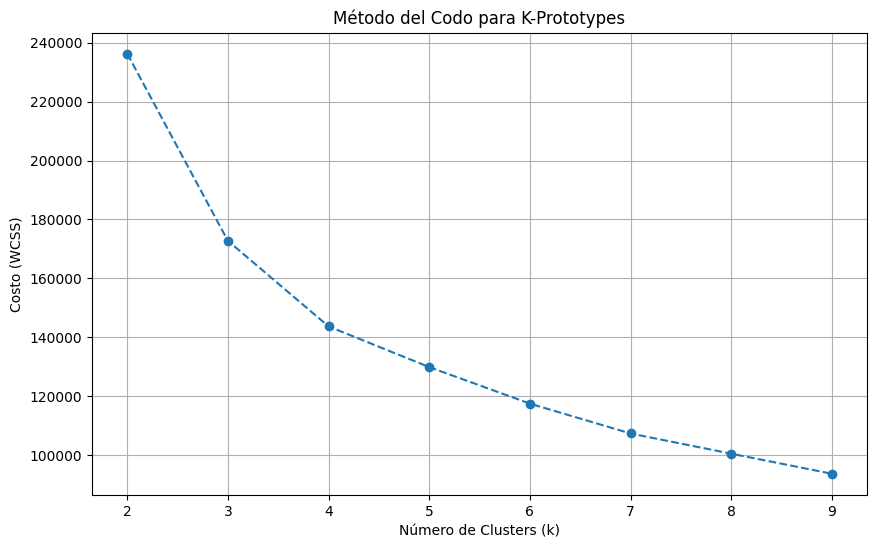

In [ ]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 10)

for k in K_range:
    kpro = KPrototypes(n_clusters=k, init='Huang', n_init=10, random_state=42)
    
    # Pasamos la matriz mixta y los índices categóricos correctos
    kpro.fit(X_prepared, categorical=[8,9])
    
    wcss.append(kpro.cost_)
    print(f"K={k} procesado. Costo: {kpro.cost_:.2f}")

# Graficar
plt.figure(figsize=(10,6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Costo (WCSS)')
plt.grid(True)
plt.show()

In [80]:
kprotype = KPrototypes(n_clusters=5, init='Huang', random_state=42)

In [81]:
labes = kprotype.fit_predict(X_prepared, categorical=[8,9])

In [ ]:

features_df['Cluster'] = kprotype.labels_

print(features_df['Cluster'].value_counts())

Cluster
0    16090
3     6467
2     2782
4     1810
1      443
Name: count, dtype: int64


In [ ]:

num_cols = numeric_features
cat_cols = categorical_features

# Análisis de variables numéricas (Promedios)
print("--- Promedios por Cluster ---")
print(features_df.groupby('Cluster')[num_cols].mean())

# Análisis de variables categóricas (Moda)
print("\n--- Moda (Categoría más común) por Cluster ---")
# Función lambda para sacar la moda
print(features_df.groupby('Cluster')[cat_cols].agg(lambda x: x.mode()[0]))

--- Promedios por Cluster ---
         promedio_calif  std_calif  num_asignaturas  tasa_aprobacion  \
Cluster                                                                
0             14.797401   1.763183         9.845991         0.981067   
1              6.117644   4.043580         6.489842         0.343693   
2              7.763924   4.819537         6.277858         0.435144   
3             12.854711   2.713516        10.606154         0.859710   
4              7.953753   4.091957         7.093923         0.456453   

         num_semestres_activos  total_repitencias  max_rep_asignatura  \
Cluster                                                                 
0                     1.715538           0.017961            0.017961   
1                     1.674944          18.376975            3.273138   
2                     1.716391           1.521567            0.698418   
3                     1.957167           1.689964            1.112881   
4                     1.768

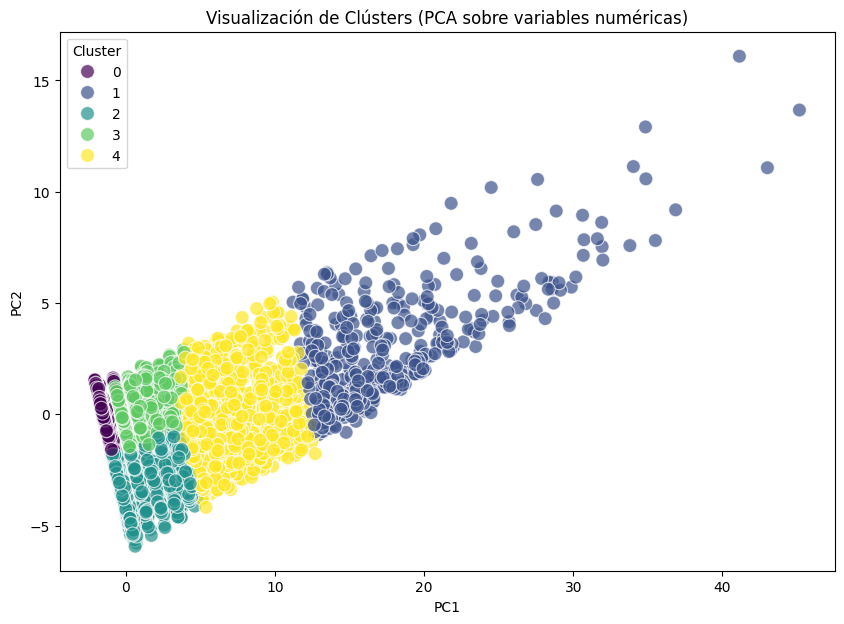

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Nota: PCA solo funciona con números. Usaremos solo las columnas numéricas de X_prepared

X_numeric = X_prepared[:, :8]  

# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_numeric)

# Creamos un DF temporal para graficar
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kprotype.labels_

# Graficamos
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', 
    hue='Cluster', palette='viridis', s=100, alpha=0.7
)
plt.title('Visualización de Clústers (PCA sobre variables numéricas)')
plt.show()

c:\Users\mauri\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\mauri\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\mauri\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\mauri\AppData\Local\Programs\Python\Python313\

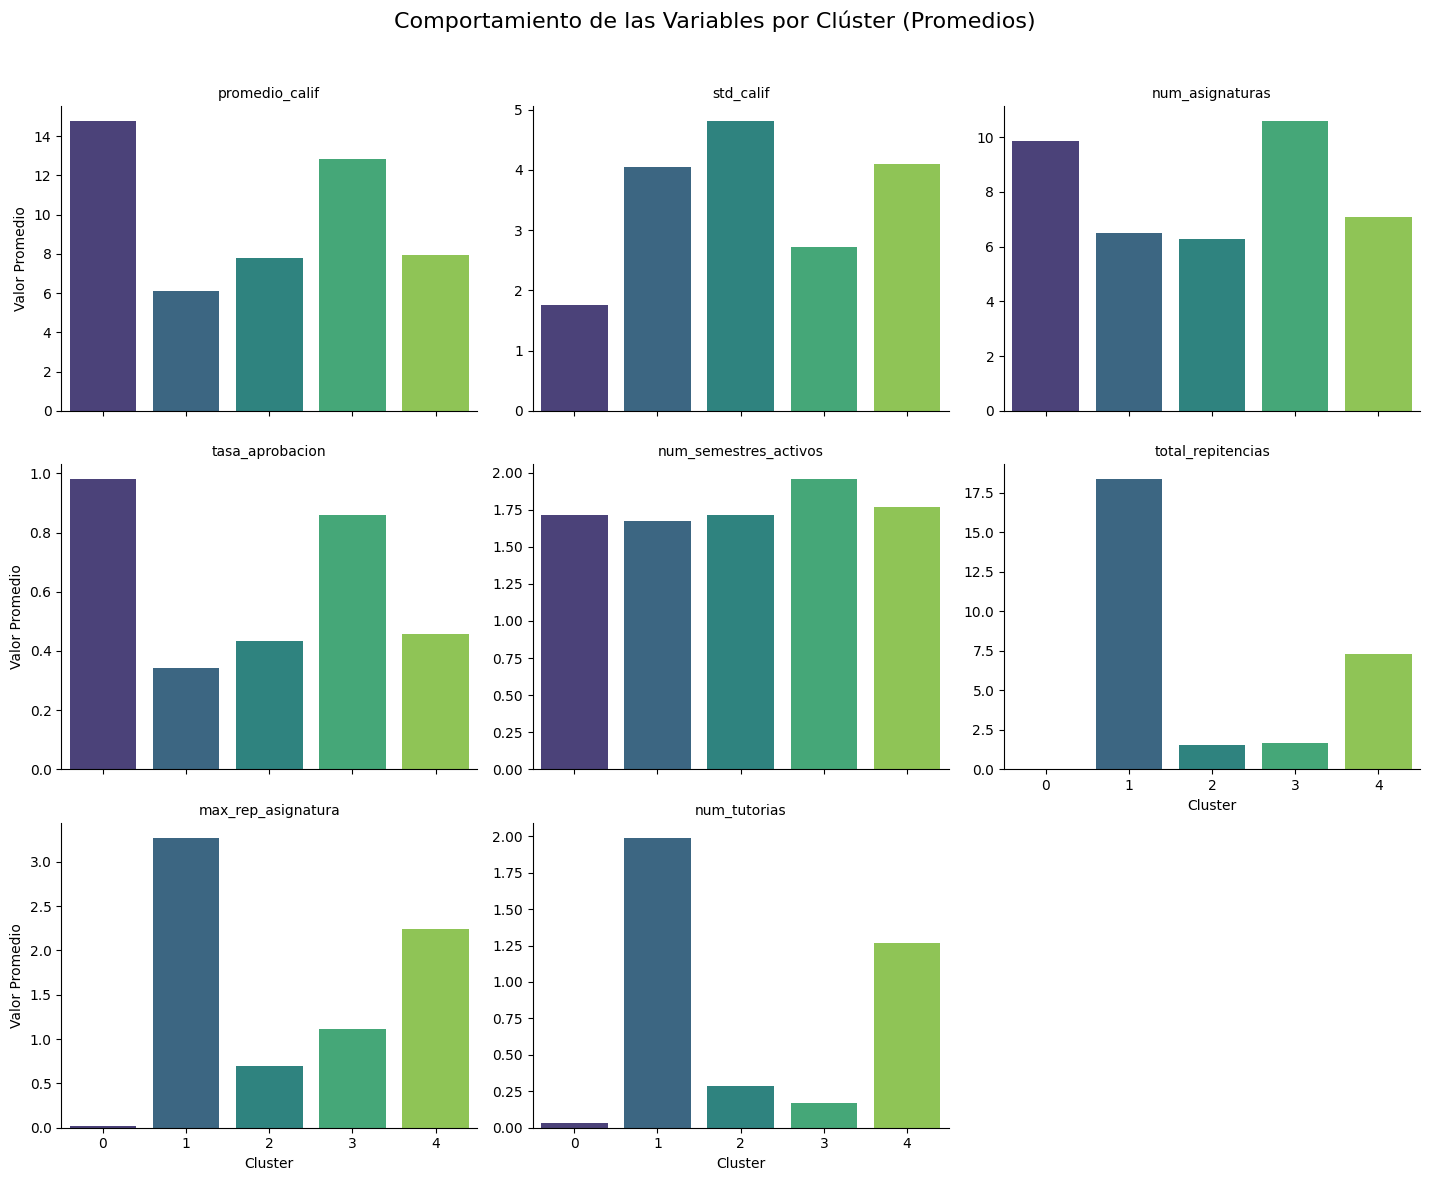

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cluster_means = features_df.groupby('Cluster')[numeric_features].mean().reset_index()


df_melted = cluster_means.melt(id_vars="Cluster", var_name="Variable", value_name="Valor Promedio")


g = sns.FacetGrid(df_melted, col="Variable", col_wrap=3, sharey=False, height=4, aspect=1.2)
g.map(sns.barplot, "Cluster", "Valor Promedio", order=sorted(df_melted.Cluster.unique()), palette="viridis")

g.set_titles("{col_name}")  # Título
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comportamiento de las Variables por Clúster (Promedios)', fontsize=16)
plt.show()

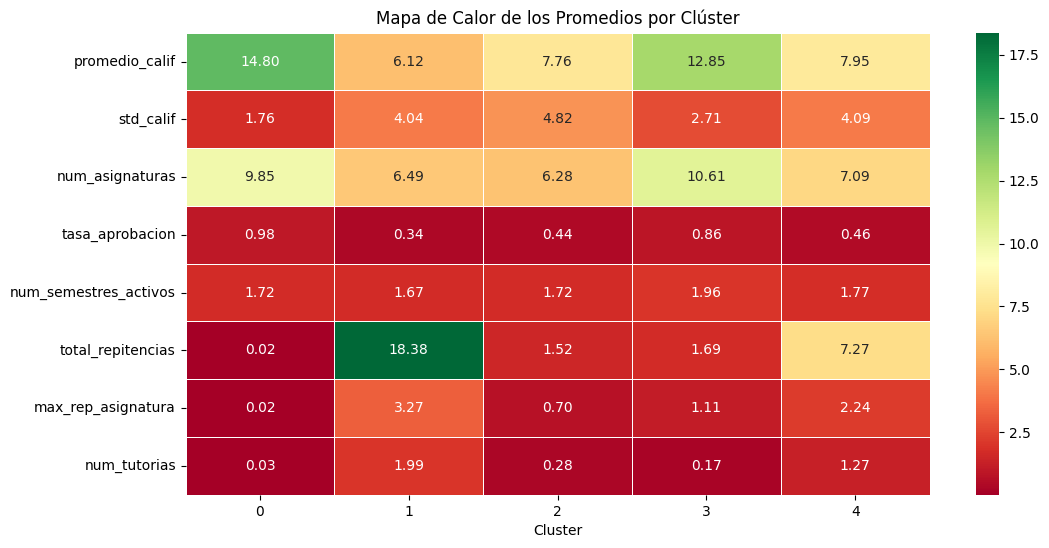

In [ ]:
plt.figure(figsize=(12, 6))

sns.heatmap(cluster_means.set_index('Cluster').T, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de los Promedios por Clúster')
plt.show()

### CLUSTER 0 : Estudiantes Excelentes : El promedio de calificacion es alto, la desviacion de las calificaciones es poca, el numero de asignaturas que llevan es la mayor respecto a los demas, y el numero de repitencias casi ni existe, ademas la tasa de aprobacion es demasiado alta .. // Facultad de Medicina

### CLUSTER 1 : Estudiantes Criticos: Su promedio es bajo (6.12), la desviacion estandar de las calificaciones es algo alta, lo cual lo hace ver como un grupo que varia bastante, el numero de asignaturas es el menor, pero a pesar de ello parecen ser el grupo con menos desempeño y la tasa de aprobacion es muy baja.. Acompañado de ser el grupo con la mayor cantidad de repitencias // Facultad de Ciencias Sociales

### CLUSTER 2 Y 4 : Grupos preocupantes, las metricas son muy parecidas, sin embargo el cluster N° 4 refleja que tiene un promedio mucho mas alto de repitencias en total, y por asignatura, igualmente poseen unas notas muy bajas  pero no tanto como los del cluster 1, y su tasa de aprobacion es menor al 50% // Facultad de Ciencias Matematicas y Facultad de Ciencias Contables

### CLUSTER 3 : Estudiantes con buen desempeño: El promedio de calificaciones parece ser alto pero, no tanto como los del cluster 0, la desviacion de las calificaciones parece no ser tan alta por lo que no hay tanta variacion entre sus notas, el numero de asignaturas es el mas alto, pero a pesar de ello siguen teniendo un buen promedio, y destacan por tener un porcentaje bastante alto de aprobacion // Facultad de Ingenieria de Sistemas e Informatica

#### * Los clústeres en riesgo pueden ser prioridad para programas de tutorías, reforzamiento académico y apoyo socioeconómico.

#### * Los clústeres de buen y excelente desempeño pueden servir para identificar buenas prácticas (hábitos de estudio, planificación de cursos, etc.) y replicarlas en otros grupos.

#### * La información por facultad (aunque solo uses la moda) da una primera señal de qué facultades concentran más estudiantes en riesgo y cuáles concentran más estudiantes de alto rendimiento.

En resumen, el proyecto de aprendizaje no supervisado permitió segmentar a los estudiantes de la UNMSM en cinco perfiles académicos bien diferenciados, aportando una visión más fina del rendimiento estudiantil que la que ofrecen únicamente los promedios generales. Esta segmentación ofrece insumos concretos para la toma de decisiones institucionales orientadas a la detección temprana de estudiantes en riesgo y al fortalecimiento de estrategias de apoyo académico en las distintas facultades.